<!-- Autogenerated by `scripts/make_examples.py` -->
<table align="left">
    <td>
        <a target="_blank" href="https://colab.research.google.com/github/voxel51/fiftyone-examples/blob/master/examples/comparing_YOLO_and_EfficientDet.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791629-6e618700-5769-11eb-857f-d176b37d2496.png" height="32" width="32">
            Try in Google Colab
        </a>
    </td>
    <td>
        <a target="_blank" href="https://nbviewer.jupyter.org/github/voxel51/fiftyone-examples/blob/master/examples/comparing_YOLO_and_EfficientDet.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791634-6efa1d80-5769-11eb-8a4c-71d6cb53ccf0.png" height="32" width="32">
            Share via nbviewer
        </a>
    </td>
    <td>
        <a target="_blank" href="https://github.com/voxel51/fiftyone-examples/blob/master/examples/comparing_YOLO_and_EfficientDet.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791633-6efa1d80-5769-11eb-8ee3-4b2123fe4b66.png" height="32" width="32">
            View on GitHub
        </a>
    </td>
    <td>
        <a href="https://github.com/voxel51/fiftyone-examples/raw/master/examples/comparing_YOLO_and_EfficientDet.ipynb" download>
            <img src="https://user-images.githubusercontent.com/25985824/104792428-60f9cc00-576c-11eb-95a4-5709d803023a.png" height="32" width="32">
            Download notebook
        </a>
    </td>
</table>


# Comparing YOLOv4 and EfficientDet

This example compares the [YOLOv4](https://arxiv.org/abs/2004.10934) and [EfficientDet](https://arxiv.org/abs/1911.09070) object detection models on the [COCO dataset](https://cocodataset.org/#home) using FiftyOne.

For more information check out the [YOLOv4 blog post](https://medium.com/voxel51/fifteen-minutes-with-fiftyone-yolov4-180cf66923a9?source=friends_link&sk=71922580c58ef371fbbb80f7356a872d) and [EfficientDet blog post](https://medium.com/voxel51/fifteen-minutes-with-fiftyone-efficientdet-d84b60ffff28?source=friends_link&sk=cf3f54dc3b8544e45fc70c07ae0eea30).

## Setup

If you haven't already, install FiftyOne:

In [ ]:
!pip install fiftyone

In [ ]:
import fiftyone as fo

If the above import fails, run the following two commands. There is [currently an issue](https://github.com/voxel51/fiftyone/issues/1494) with OpenCV in Colab environments.

In [ ]:
# If the FiftyOne import failed, restart the runtime by running this cell
exit()

In [ ]:
# If the FiftyOne import failed
!pip install opencv-python-headless==4.5.4.60

import fiftyone as fo

## Load dataset

First, let's load the validation split of COCO-2017 from the [FiftyOne Dataset Zoo](https://voxel51.com/docs/fiftyone/user_guide/dataset_creation/zoo.html):

In [1]:
import os

import fiftyone as fo
import fiftyone.zoo as foz

In [2]:
dataset = foz.load_zoo_dataset("coco-2017", split="validation")

Split 'validation' already downloaded
Loading 'coco-2017' split 'validation'
 100% |███████████████| 5000/5000 [41.7s elapsed, 0s remaining, 121.3 samples/s]      
Dataset 'coco-2017-validation' created


Next, let's add some pre-generated YOLOv4 and EfficientDet predictions to the dataset.

You can download the predictions from [this Google Drive link (72MB)](https://drive.google.com/file/d/1wJJy8F25ixPSfrXcYsZz6VJ3rtsVIck5).

In [3]:
# Path to the downloaded JSON file
DATASET_PATH = "/path/to/yolo_edet_dataset.json"

In [10]:
# Load the predictions
data_dir = os.path.dirname(dataset.first().filepath)
predictions = fo.Dataset.from_json(DATASET_PATH, rel_dir=data_dir)

 100% |███████████████| 5000/5000 [4.6m elapsed, 0s remaining, 18.6 samples/s]      


In [15]:
# Merge the predictions into `dataset`
dataset.merge_samples(predictions)

Let's launch the [FiftyOne App](https://voxel51.com/docs/fiftyone/user_guide/app.html) and qualitatively compare the predictions of the various models:


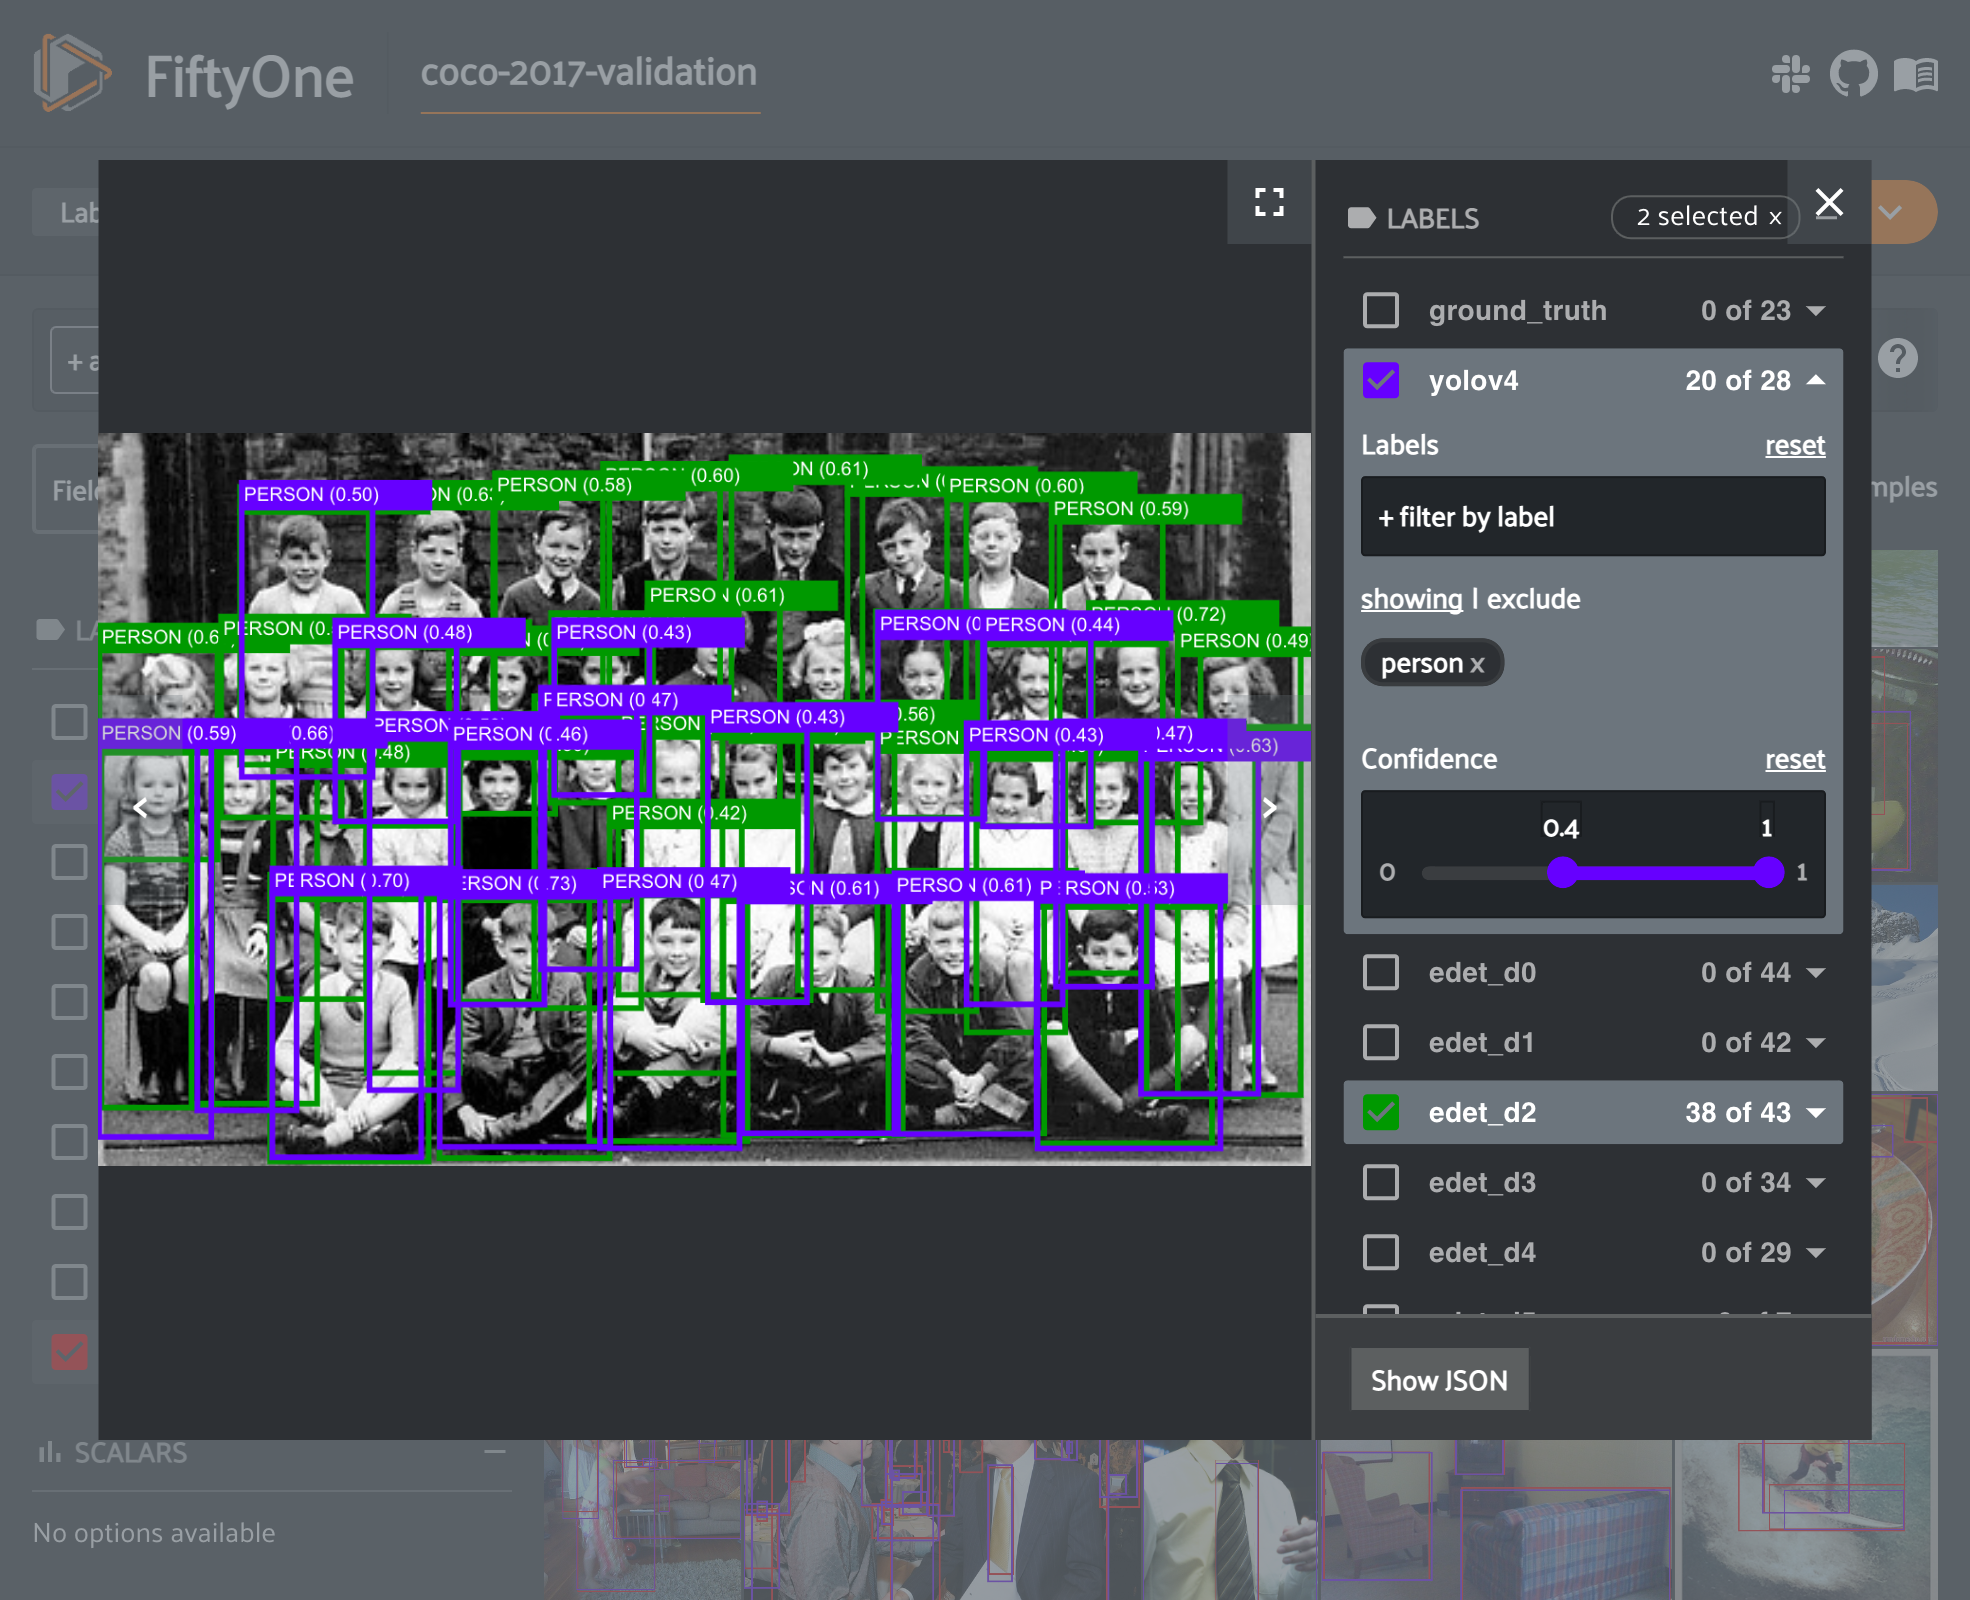

In [6]:
session = fo.launch_app(dataset)

## Evaluate and explore

You can evaluate any of the predictions with respect to the ground truth labels.

For example, let's evaluate the YOLOv4 predictions:

In [7]:
results = dataset.evaluate_detections(
    "yolov4",
    gt_field="ground_truth",
    eval_key="yolov4",
)

Evaluating detections...
 100% |███████████████| 5000/5000 [1.4m elapsed, 0s remaining, 68.4 samples/s]      


[With dataset views](https://voxel51.com/docs/fiftyone/user_guide/using_views.html), you can easily identify samples of interest. For example, let's view the samples where YOLOv4 had the most false positives:


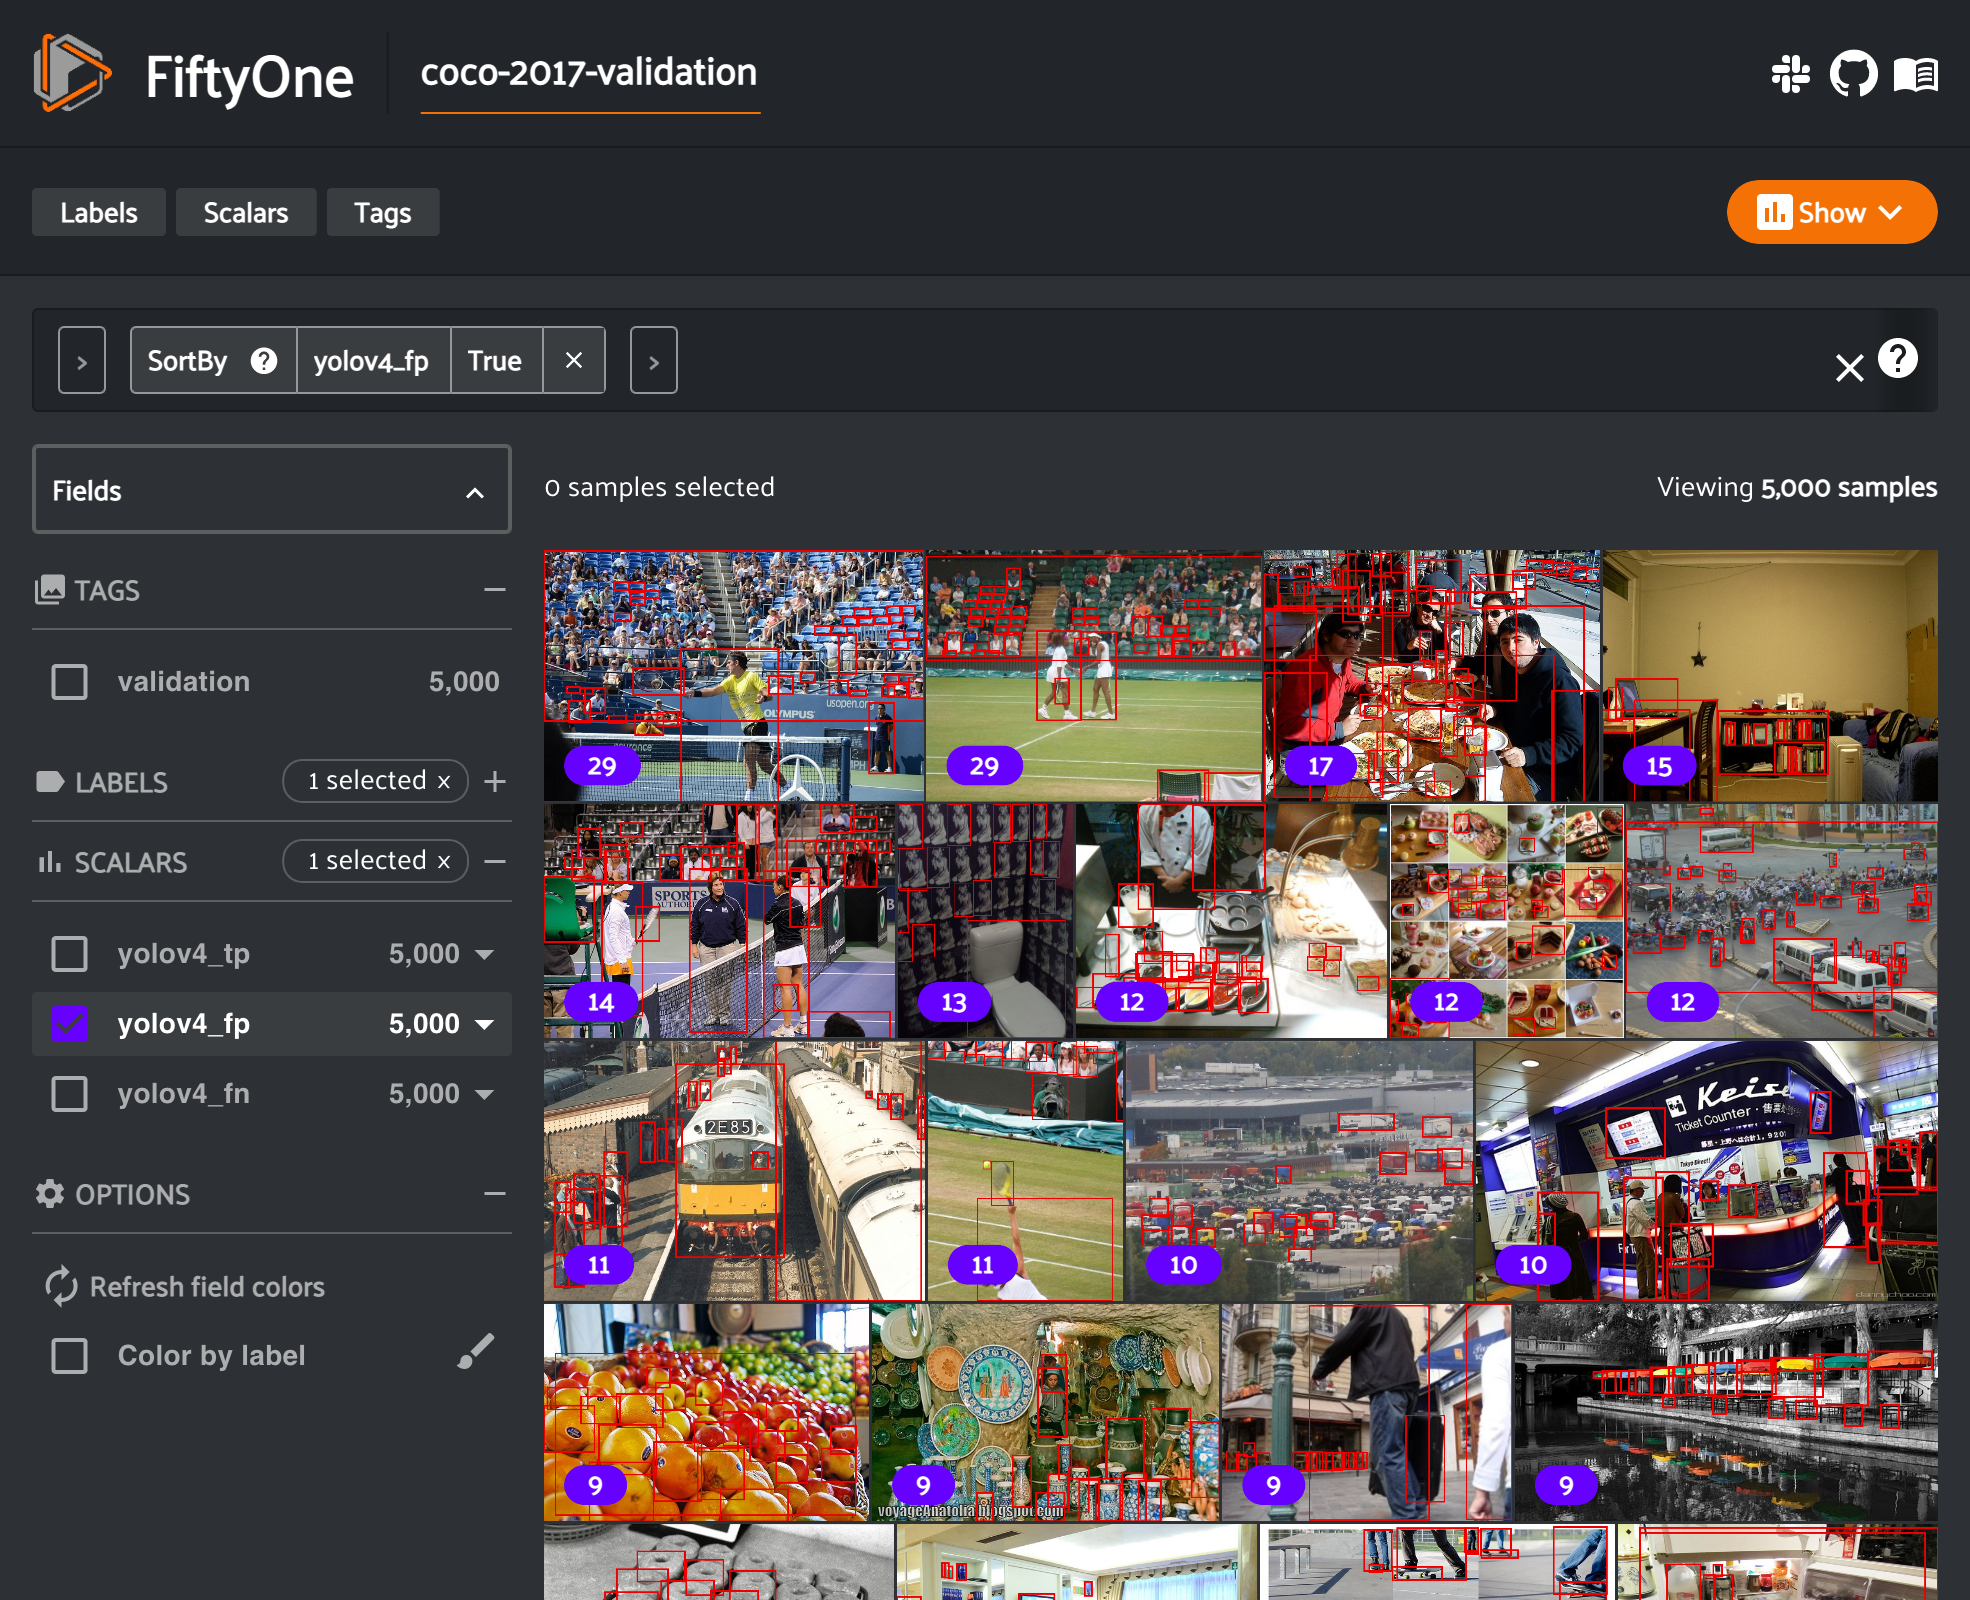

In [8]:
session.view = dataset.sort_by("yolov4_fp", reverse=True)

In [9]:
session.freeze()  # for notebook sharing